* 출처 : https://www.kaggle.com/vernon360961/rfm-cohort-analysis-and-customer-segmentation
* 데이터셋 : https://archive.ics.uci.edu/ml/datasets/Online+Retail#

In [1]:
# 라이브러리 로드
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
df = pd.read_excel('data/Online Retail.xlsx')

In [3]:
df.shape

(541909, 8)

# Data Cleaning

In [4]:
# 데이터 확인
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# 기술통계량 결과 음수값이 눈에 띔. 전처리를 할 필요성.
df.shape[0]

541909

In [7]:
missing_percent = pd.DataFrame(df.isnull().mean()*100)
missing_percent

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


In [8]:
missing_percent = pd.DataFrame(df.isnull().mean()*100)
missing_percent.rename(columns={0: 'Percentage'}, inplace=True) # 0을 'Percentage'로 재정의
missing_percent.sort_values(by=['Percentage'], ascending = False) # percentage 값을 기준으로 내림차순 정렬

,Percentage
CustomerID,24.926694
Description,0.268311
InvoiceNo,0.000000
StockCode,0.000000
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
Country,0.000000


In [9]:
# null 값을 살펴본결과 약 25%의 결측치가 CustomerD에 존재
# CustomerID가 없는 값은 id_null 이라는 컬럼을 만들어 값 체크
# True는 1로, False는 0으로 값을 변경
df['id_null'] = np.where(df['CustomerID'].isnull(), 1, 0)

In [10]:
# Percentage of missing customer isds per country
# 국가별로 id_null 값의 평균 비율
null_by_country = df.groupby('Country')["id_null"].mean().to_frame()
# 컬럼명 'Percentage'로 변경
null_by_country.rename(columns={'id_null' : 'Percentage'},
                      inplace=True)
# 내림차순으로 정렬
null_by_country.sort_values(by='Percentage', ascending=False) * 100

,Percentage
Country,
Hong Kong,100.000000
Unspecified,45.291480
United Kingdom,26.963861
Israel,15.824916
Bahrain,10.526316
EIRE,8.674963
Switzerland,6.243756
Portugal,2.567479
France,0.771298


<AxesSubplot:>

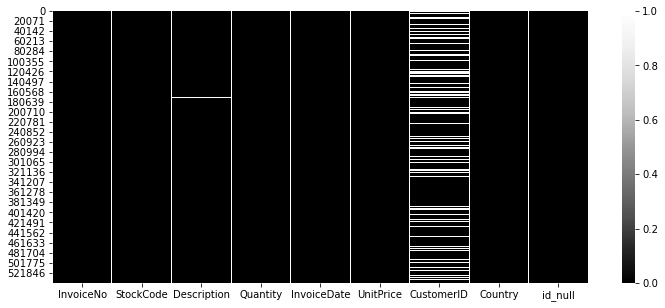

In [11]:
# 결측치 heatmap으로 시각화
# seaborn의 heatmap은 누락된 데이터를 시각화하는데 도움이 된다
plt.figure(figsize=(12, 5))
sns.heatmap(df.isnull(), cmap="Greys_r")

In [12]:
# 누락된 데이터 제거
df = df.dropna(subset=['CustomerID'])
# 다시 결측치 확인
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
id_null        0
dtype: int64

In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID,id_null
count,406829.000000,406829.000000,406829.000000,406829.0
mean,12.061303,3.460471,15287.690570,0.0
std,248.693370,69.315162,1713.600303,0.0
min,-80995.000000,0.000000,12346.000000,0.0
25%,2.000000,1.250000,13953.000000,0.0
50%,5.000000,1.950000,15152.000000,0.0
75%,12.000000,3.750000,16791.000000,0.0
max,80995.000000,38970.000000,18287.000000,0.0


앞의 기술통계량에서 확인했던 음의 값을 전처리해야 함

In [14]:
# 음의 값 확인
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,0
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,0
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,0
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,0


In [15]:
# 더 자세히 살펴보기 위해 고객 중 하나를 살펴보기
df[df['CustomerID'] == 17548]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,0
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0
165024,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,2011-04-20 12:01:00,1.25,17548.0,United Kingdom,0
165025,550755,22082,RIBBON REEL STRIPES DESIGN,10,2011-04-20 12:01:00,1.65,17548.0,United Kingdom,0
165026,550755,22081,RIBBON REEL FLORA + FAUNA,10,2011-04-20 12:01:00,1.65,17548.0,United Kingdom,0


* 데이터를 살펴보니 음의 양을 가지고 있는 고객은 InvoiceNo 앞에 모두 'C'가 붙어있는 것을 확인.
* 이로보아 상품을 반품 혹은 취소한 고객인 것으로 추정됨
* 추정이지만 데이터 세트에서 음수값을 가질수 없으므로 제거하기로 결정
* 음수값과 null 값은 특히 어떤 상품이 많이 취소되었는지 원인을 분석하는데 힌트를 제공할 수도 있을 것

In [16]:
# Quentity가 양인 값만 df에 담는다
df = df[df['Quantity'] > 0]

In [17]:
# UnitPrice가 0보다 큰 값만 df에 담는다
df = df[df['UnitPrice'] > 0]

In [18]:
# 중복 데이터값도 제거
print(df.shape)
df = df.drop_duplicates()
df.shape

(397884, 9)


(392692, 9)

In [19]:
df.describe()

,Quantity,UnitPrice,CustomerID,id_null
count,392692.000000,392692.000000,392692.000000,392692.0
mean,13.119702,3.125914,15287.843865,0.0
std,180.492832,22.241836,1713.539549,0.0
min,1.000000,0.001000,12346.000000,0.0
25%,2.000000,1.250000,13955.000000,0.0
50%,6.000000,1.950000,15150.000000,0.0
75%,12.000000,3.750000,16791.000000,0.0
max,80995.000000,8142.750000,18287.000000,0.0


# EDA
* 전처리를 끝내고 탐색적 데이터 분석 시작
* 전처리를 통해 축소된 관측치를 가지고 분석을 할 수 있게 되었다

In [20]:
# 데이터 확인
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0


In [21]:
# TotalCost 값 만들기 (수량 X 단가)
df['TotalCost'] = df['Quantity'] * df['UnitPrice']
# 데이터 확인
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00


In [22]:
df.describe()

,Quantity,UnitPrice,CustomerID,id_null,TotalCost
count,392692.000000,392692.000000,392692.000000,392692.0,392692.000000
mean,13.119702,3.125914,15287.843865,0.0,22.631500
std,180.492832,22.241836,1713.539549,0.0,311.099224
min,1.000000,0.001000,12346.000000,0.0,0.001000
25%,2.000000,1.250000,13955.000000,0.0,4.950000
50%,6.000000,1.950000,15150.000000,0.0,12.450000
75%,12.000000,3.750000,16791.000000,0.0,19.800000
max,80995.000000,8142.750000,18287.000000,0.0,168469.600000


In [23]:
# 160000 이상 구매한 고객 (특이치)
df[df['TotalCost'] > 160000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,0,168469.6


In [24]:
# 값이 특이하게 너무 많이 구매되었으므로 이 데이터는 제거하고 분석을 계속 진행
df = df[df['TotalCost'] < 160000].copy()
df.shape

(392691, 10)

## **Most purchased products** ##
* 어떤 제품이 고객에게 가장 잘 팔렸을까?
* 이를 통해 수요를 추적하고 고객에게 맞는 최상의 서비스를 준비할 수 있다

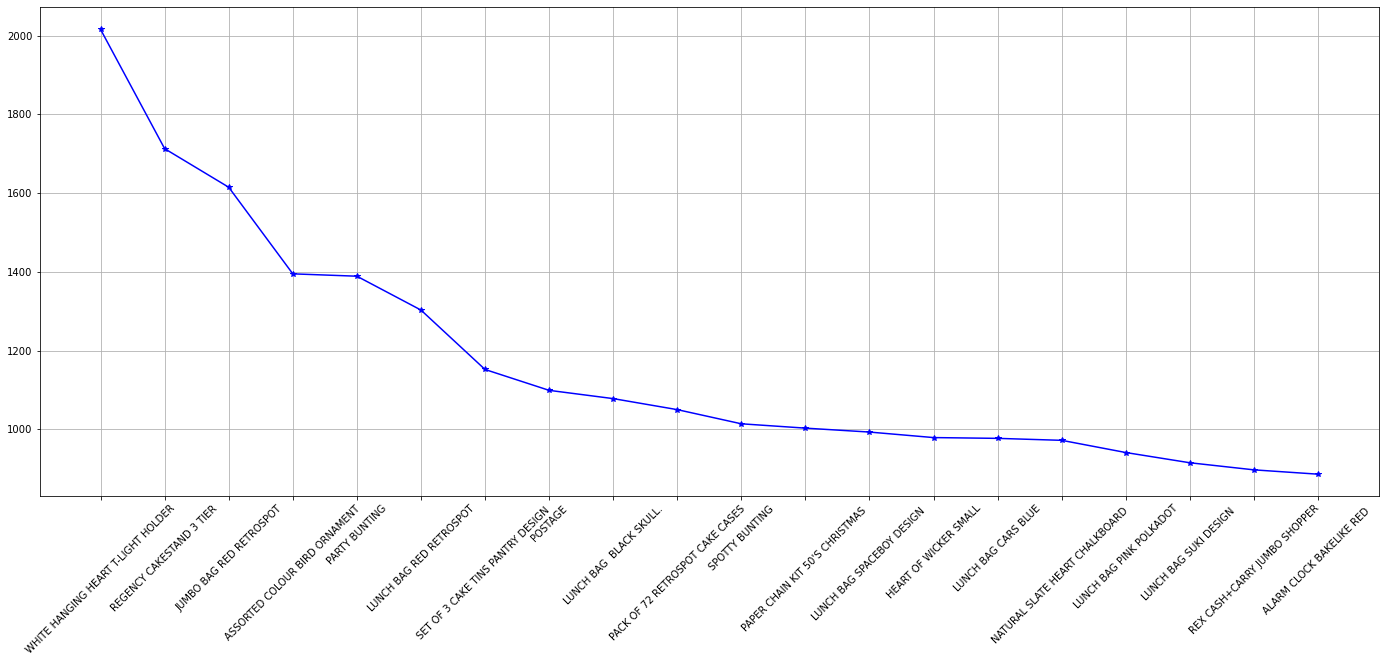

In [25]:
# 수요가 높은 상위 20개의 제품 이름과 주문 수
most_purchased_prods = pd.DataFrame(df['Description'].value_counts().head(20))
# 변수 이름 바꾸기
most_purchased_prods = most_purchased_prods.rename(columns={'Description':'Count'})
most_purchased_prods

# 그래프로 시각화
plt.figure(figsize=(24, 9)) # 그래프 사이즈
plt.xticks(rotation=45) # x축 이름 설정
plt.plot(most_purchased_prods, 'b*-') # 따옴표 부분은 색깔과 선, 포인트 스타일 나타낸 것
plt.grid() # 격자 표시

<AxesSubplot:>

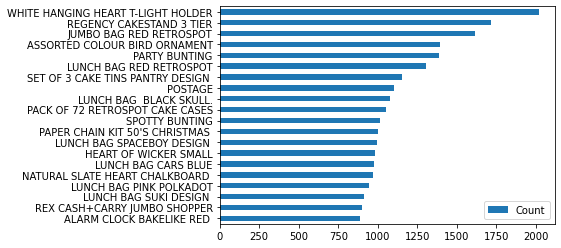

In [26]:
most_purchased_prods.sort_values("Count").plot.barh()

## **Country with the most purchases** ##
* 상품의 소비가 가장 많은 나라는?
* 수요가 많은 영국을 제외한 다른 나라들의 소비량은?

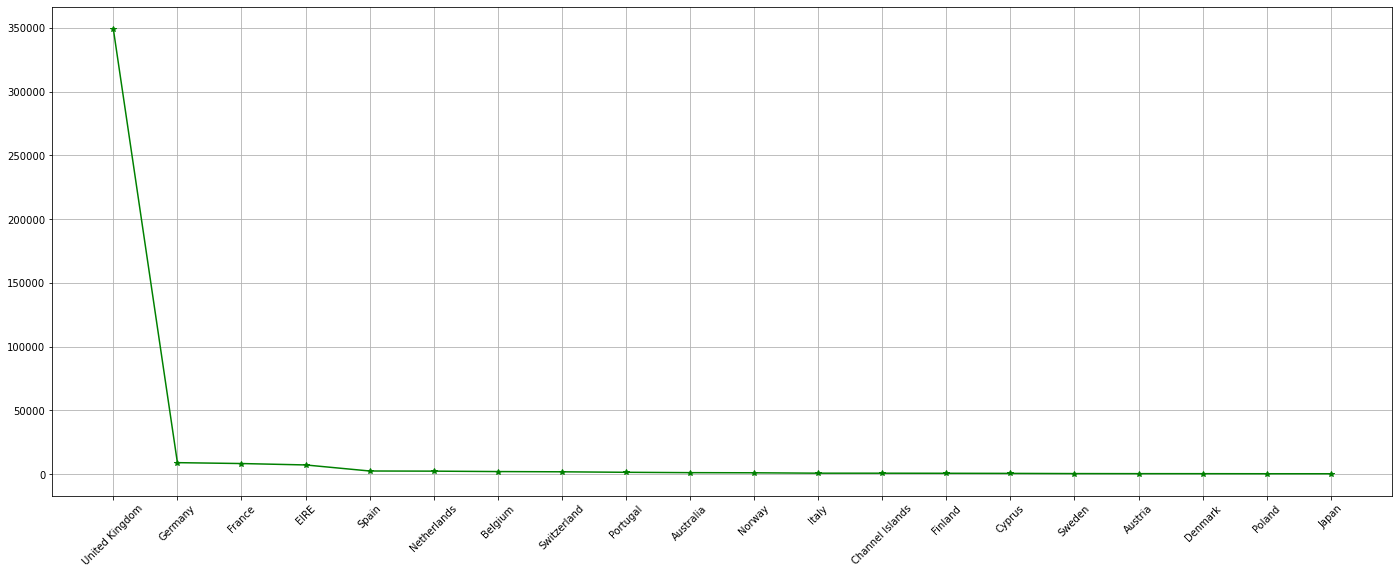

In [27]:
# 소비량이 많은 상위 20개의 나라
most_purchased_bycountry = pd.DataFrame(df['Country'].value_counts().head(20)).rename(columns={'Country':'Count'})

# 시각화
plt.figure(figsize = (24, 9))
plt.xticks(rotation = 45)
plt.plot(most_purchased_bycountry, 'g*-')
plt.grid()

In [28]:
most_purchased_bycountry

,Count
United Kingdom,349202
Germany,9025
France,8326
EIRE,7226
Spain,2479
Netherlands,2359
Belgium,2031
Switzerland,1841
Portugal,1453
Australia,1181


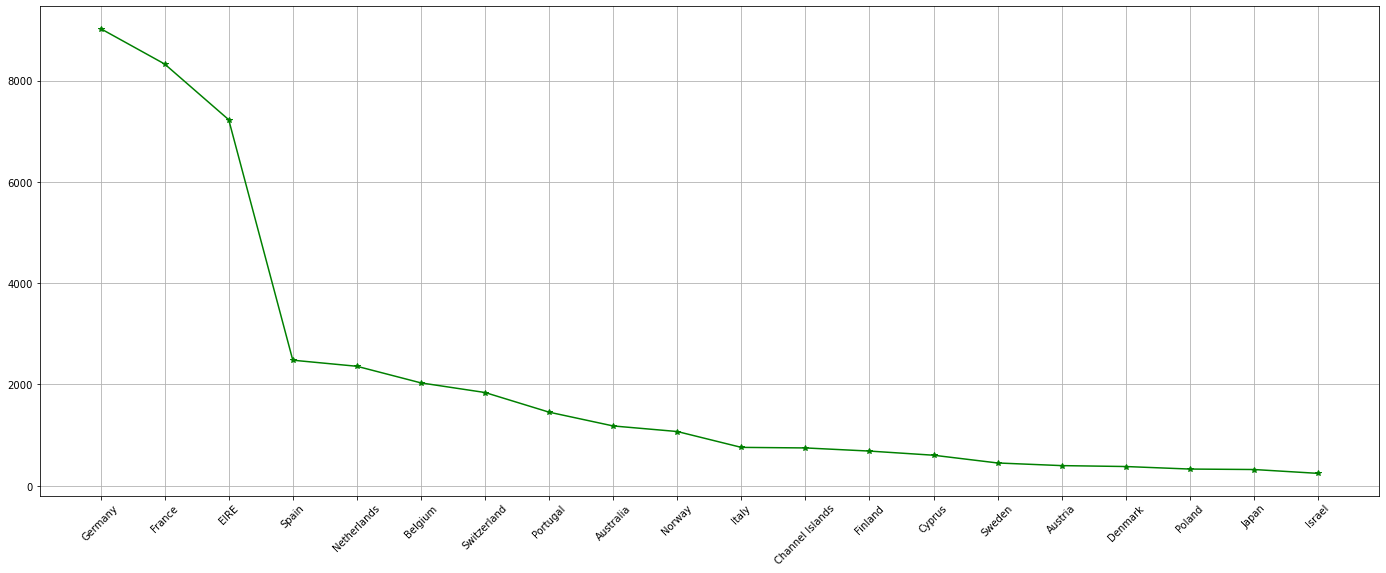

In [29]:
# 위의 그래프에서 영국의 소비량이 현저히 높으므로, 영국의 데이터를 제외하고 다시 한 번 분석
nonuk_df = df[df['Country'] != 'United Kingdom'] # 영국 제외
# 데이터 프레임 형태로
most_purchased_bycountry_nonuk = pd.DataFrame(nonuk_df['Country'].value_counts().head(20)).rename(columns={'Country':'Count'})

# 시각화
plt.figure(figsize = (24, 9))
plt.xticks(rotation = 45)
plt.plot(most_purchased_bycountry_nonuk, 'g*-')
plt.grid()

시각화 결과를 보면 독일, 프랑스, 아일랜드 등의 소비량이 많다. 그러므로 이 국가들에 대한 추가 투자를 하거나
이 지역들에 매장을 설립하면 운송비용을 줄이고 판매를 촉진할 수 있을 것으로 예상된다.

## **Country-wise Revenue** ##

In [30]:
# id_null 컬럼을 사용했기 때문에 제거
# del df["id_null"]

## **Cardinality of the dataset** ##

In [31]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.3


In [32]:
# 데이터들의 고유값이 몇개인지 알아보기
print('Number of unique Invoice Nos: %d'%(df['InvoiceNo'].nunique()))
print('Number of unique StockCode: %d'%(df['StockCode'].nunique()))
print('Number of different Descriptions: %d'%(df['Description'].nunique()))
print('Number of unique Customer Ids: %d'%(df['CustomerID'].nunique()))
print('Number of different Countries: %d'%(df['Country'].nunique()))



Number of unique Invoice Nos: 18531
Number of unique StockCode: 3664
Number of different Descriptions: 3876
Number of unique Customer Ids: 4338
Number of different Countries: 37


In [33]:
df.nunique()

InvoiceNo      18531
StockCode       3664
Description     3876
Quantity         300
InvoiceDate    17281
UnitPrice        440
CustomerID      4338
Country           37
id_null            1
TotalCost       2938
dtype: int64

InvoiceDate 열의 날짜만 가져와서 데이터타입을 날짜/시간 타입으로 변경

In [34]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 392691, dtype: datetime64[ns]

In [35]:
df['InvoiceDateCon'] = df['InvoiceDate'].dt.date
df['InvoiceDateCon'].head()

0    2010-12-01
1    2010-12-01
2    2010-12-01
3    2010-12-01
4    2010-12-01
Name: InvoiceDateCon, dtype: object

In [36]:
df['InvoiceDateCon'] = pd.to_datetime(df['InvoiceDateCon'])
df['InvoiceDateCon'].head()

0   2010-12-01
1   2010-12-01
2   2010-12-01
3   2010-12-01
4   2010-12-01
Name: InvoiceDateCon, dtype: datetime64[ns]

# Cohort Analysis
* 코호트란 동일한 특성을 공유하는 주제 그룹을 의미한다
* 코호트 분석은 고객의 행동방식에 대한 개요를 제공하므로 디지털 마케팅에서 중요한 역할을 한다
* 코호트 분석을 통해 가치 창출, 예산 할당 등의 정보를 얻을 수 있다
* 코호트의 유형은 타임 코호트(구매 시간 기준), 행동 코호트(제품 구매 기준), 규모 코호트(특정 시간 소비한 금액 기준)로 나눠진다
* 코호트의 가장 큰 특징은 고객을 개개인으로 보는 것이 아닌 분석을 위해 하나의 관련 그룹으로 보는 것이다

In [37]:
# 구매날짜가 같은 그룹을 만들기 위해 InvoiceDataCon 컬럼의 값을 구매날짜의 첫번째 일로 모두 바꾼다
# datetime 라이브러리를 통해 날짜를 만들어주고, apply로 함수 생성
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [38]:
# 함수 적용
df['InvoiceDateCon'] = df['InvoiceDateCon'].apply(get_month)

In [39]:
# 함수가 적용되었는지 확인
df.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost,InvoiceDateCon
412388,572287,20973,12 PENCIL SMALL TUBE WOODLAND,2,2011-10-23 12:26:00,0.65,15584.0,United Kingdom,0,1.30,2011-10-01
196534,553856,21212,PACK OF 72 RETROSPOT CAKE CASES,1,2011-05-19 13:28:00,0.55,16813.0,United Kingdom,0,0.55,2011-05-01
1429,536542,85099B,JUMBO BAG RED RETROSPOT,40,2010-12-01 14:11:00,1.95,16456.0,United Kingdom,0,78.00,2010-12-01


* 이제 이 열을 사용하여 데이터 집합을 조작, 필요한 열을 만든다.
* 위의 데이터 사례의 경우 동질 집단 월을 작성해야 한다.
* 수행단계는 다음과 같다.
1. CustomerID별로 데이터 세트를 그룹화
2. 해당 그룹에 대한 InvoiceDate 선택
3. 변환 기능을 사용해 고객이 구매한 가장 빠른 달을 얻을 수 있다. 이 가장 빠른달이 그들의 '코호트'이다.

In [40]:
# 코호트 달 구하기
df['CohortMonth']=df.groupby("CustomerID")['InvoiceDateCon'].transform("min")

In [41]:
# 데이터 확인
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost,InvoiceDateCon,CohortMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0,10.20,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0,12.60,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,0,14.85,2011-12-01,2011-08-01


* 코호트 월과 송장 월의 차이를 계산한 관측치에 대한 코호트 지수 얻기
* 이것이 모든 종류의 분석을 수행하는 기준 데이터가 될 것

In [42]:
# 우선, 데이터 확인
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost,InvoiceDateCon,CohortMonth
169746,551250,21926,RED/CREAM STRIPE CUSHION COVER,1,2011-04-27 12:00:00,1.25,17841.0,United Kingdom,0,1.25,2011-04-01,2010-12-01
534935,581175,23447,PINK BUNNY EASTER EGG BASKET,144,2011-12-07 15:16:00,1.45,14646.0,Netherlands,0,208.80,2011-12-01,2010-12-01
399597,571282,23114,VINTAGE LEAF CHOPPING BOARD,1,2011-10-16 13:24:00,4.95,15545.0,United Kingdom,0,4.95,2011-10-01,2010-12-01
85406,543468,47566,PARTY BUNTING,3,2011-02-08 14:45:00,4.95,14562.0,United Kingdom,0,14.85,2011-02-01,2011-02-01
331511,566018,21670,BLUE SPOT CERAMIC DRAWER KNOB,2,2011-09-08 12:42:00,1.45,13137.0,United Kingdom,0,2.90,2011-09-01,2011-02-01
428514,573481,84931A,PINK SCOTTIE DOG W FLOWER PATTERN,6,2011-10-31 11:10:00,2.55,13994.0,United Kingdom,0,15.30,2011-10-01,2011-07-01
274508,560920,84968A,SET OF 16 VINTAGE ROSE CUTLERY,3,2011-07-21 18:36:00,12.75,15370.0,United Kingdom,0,38.25,2011-07-01,2011-01-01
508769,579269,72122,COFFEE SCENT PILLAR CANDLE,12,2011-11-29 09:48:00,0.95,14601.0,United Kingdom,0,11.40,2011-11-01,2011-11-01
363765,568578,21706,FOLDING UMBRELLA RED/WHITE POLKADOT,4,2011-09-28 09:43:00,4.95,15301.0,United Kingdom,0,19.80,2011-09-01,2010-12-01
140516,548408,22072,RED RETROSPOT TEA CUP AND SAUCER,4,2011-03-31 10:26:00,3.75,17438.0,United Kingdom,0,15.00,2011-03-01,2011-03-01


In [43]:
cohort_year = df["CohortMonth"].dt.year
cohort_month = df["CohortMonth"].dt.month

In [44]:
# 연도와 열을 추출하는 함수 만들기
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

# 함수를 적용해서 송장 년, 월 구하기
invoice_year, invoice_month = get_date_int(df, 'InvoiceDateCon')

# 코호트 달 컬럼도 마찬가지로 년, 월 구하기
cohort_year, cohort_month = get_date_int(df, 'CohortMonth')

# 송장 년 - 코호트 년, 송장 월 - 코호트 월 각각의 차이를 구해서 새 변수에 넣어주기
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

# 연도에는 12를 곱하고 월에는 1을 더해주어 새 컬럼(코호트 지수) 만들기
df['CohortIndex'] = (years_diff * 12) + (months_diff + 1)

In [45]:
# 데이터 확인
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost,InvoiceDateCon,CohortMonth,CohortIndex
259691,559704,22329,ROUND CONTAINER SET OF 5 RETROSPOT,12,2011-07-12 09:54:00,1.65,12669.0,France,0,19.80,2011-07-01,2011-03-01,5
266937,560276,21985,PACK OF 12 HEARTS DESIGN TISSUES,72,2011-07-17 15:11:00,0.29,14606.0,United Kingdom,0,20.88,2011-07-01,2010-12-01,8
374582,569383,23295,SET OF 12 MINI LOAF BAKING CASES,16,2011-10-03 16:46:00,0.83,15159.0,United Kingdom,0,13.28,2011-10-01,2010-12-01,11
156603,550152,21533,RETROSPOT LARGE MILK JUG,1,2011-04-14 14:43:00,4.95,17362.0,United Kingdom,0,4.95,2011-04-01,2011-02-01,3
76558,542629,20682,RED RETROSPOT CHILDRENS UMBRELLA,24,2011-01-31 09:57:00,3.25,12731.0,France,0,78.00,2011-01-01,2010-12-01,2


<AxesSubplot:xlabel='CohortIndex', ylabel='count'>

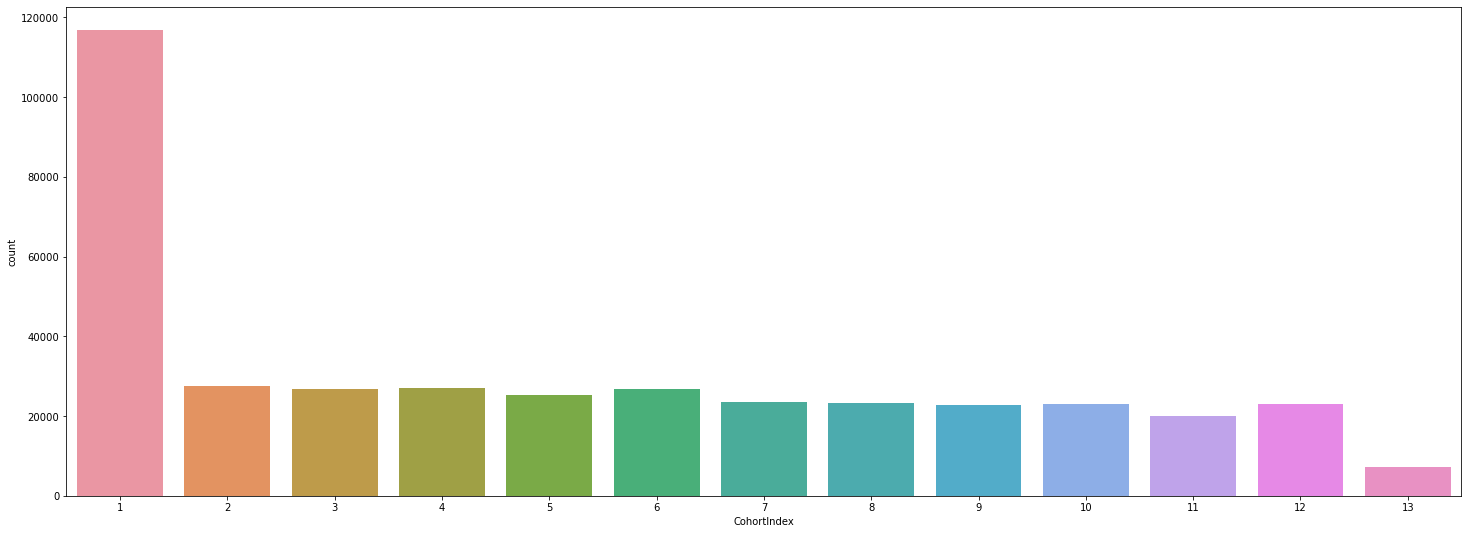

In [46]:
# 시각화
# 고객이 구매한지 몇 개월이 지났는지에 대한 인덱스
plt.figure(figsize=(25,9))
sns.countplot(data=df, x="CohortIndex")

In [47]:
df["InvoiceDate"].dt.time

0         08:26:00
1         08:26:00
2         08:26:00
3         08:26:00
4         08:26:00
            ...   
541904    12:50:00
541905    12:50:00
541906    12:50:00
541907    12:50:00
541908    12:50:00
Name: InvoiceDate, Length: 392691, dtype: object

In [48]:
# dt.time으로 InvoiceDate의 시간 추출
df['TimeOfPurchase'] = df["InvoiceDate"].dt.time

# 데이터 확인
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost,InvoiceDateCon,CohortMonth,CohortIndex,TimeOfPurchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30,2010-12-01,2010-12-01,1,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,2010-12-01,2010-12-01,1,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00,2010-12-01,2010-12-01,1,08:26:00


* Datetime 패키지를 사용해 InvoiceDate 열에서 시간 데이터 추출 -> 대부분의 구매 시기를 알 수 있다
* 구매 시간을 그룹화하여 어느 시간대에 많이 구매하는지 알아 볼 수도 있다

In [49]:
time_of_purchase = df.groupby('TimeOfPurchase')['TimeOfPurchase'].count()
time_of_purchase

TimeOfPurchase
06:20:00      1
07:35:00     43
07:36:00     27
07:37:00     26
07:38:00     23
           ... 
20:09:00    129
20:12:00     64
20:13:00    123
20:16:00     23
20:18:00     49
Name: TimeOfPurchase, Length: 738, dtype: int64

<AxesSubplot:xlabel='TimeOfPurchase'>

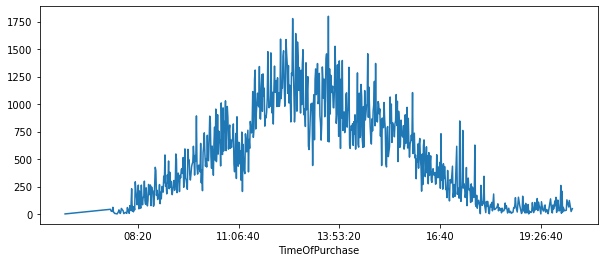

In [50]:
# 시각화
time_of_purchase.plot(figsize=(10, 4))

위의 시각화 결과 점심시간에 구매가 많이 이루어지는 것을 알 수 있다

* Cohort Month와 Cohort Index를 구했으므로 이 데이터를 월별, 인덱스 별로 그룹화 할 수 있다
* 해당 코호트의 고유 고객수를 계산하는 cohort_counts 데이터를 만든다

In [51]:
cohort_counts = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().unstack()
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='CohortMonth'>

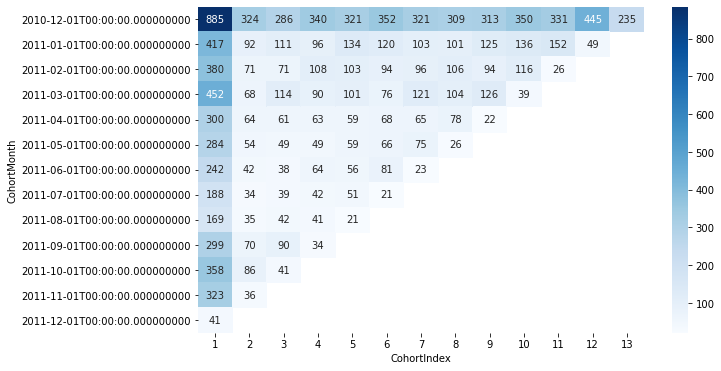

In [52]:
# heatmap으로 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(cohort_counts, annot=True, fmt='.0f', cmap='Blues')

* 코호트 데이터와 관련된 표를 작성했으므로 각 월에 다시 방문하기로 선택한 고객 비율 계산도 가능하다
* 이것이 고객 유지 테이블의 기초가 된다

In [53]:
retention_round = cohort_counts.div(cohort_counts[1], axis=0).round(3) * 100
retention_round.index = retention_round.index.date
retention_round.index

Index([2010-12-01, 2011-01-01, 2011-02-01, 2011-03-01, 2011-04-01, 2011-05-01,
       2011-06-01, 2011-07-01, 2011-08-01, 2011-09-01, 2011-10-01, 2011-11-01,
       2011-12-01],
      dtype='object')

In [54]:
retention_round

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.2,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,100.0,23.4,30.1,11.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex'>

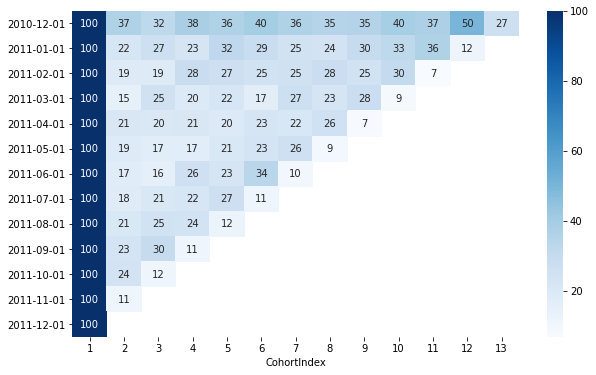

In [55]:
# 위에서 구한 retention_round로 heatmap 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(retention_round, annot=True, cmap='Blues', fmt='.0f')

In [56]:
# TimeOfPurchase 컬럼은 삭제
del df["TimeOfPurchase"]

# Feature engineering
* 이제 RFM 열 생성을 할 수 있다
* 시작하려면 마지막 인보이스의 타임 스탬프가 필요하므로 타임 스탬프와 인보이스 날짜간의 차이를 계산
* 이는 최신의 매트릭을 계산하는데 도움이 된다

In [57]:
# 타임스탬프 = 가장 최근의 InvoiceDate + 1
last_timestamp = df['InvoiceDate'].max() + dt.timedelta(days = 1)

## **RFM** ##
* Recency(최근성), Frequency(구매빈도), Monetary(구매금액) 그룹화는 각 CustomerID를 기반으로 수행된다
* 목표는 CustomerID별로 그룹화 한 다음 고객이 마지막으로 구매 한 기간, 고객이 당사 사이트에서 구매 한 빈도 및 각 고객의 소비 총 금액을 계산하는 것이다
* 이것은 매우 간단하며 집계 함수를 사용하여 수행 할 수 있다

In [58]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost,InvoiceDateCon,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.3,2010-12-01,2010-12-01,1


In [59]:
rfm = df.groupby(['CustomerID']).agg({'InvoiceDate' : lambda x : (last_timestamp - x.max()).days, # 마지막으로 구매한 기간
                                       'InvoiceNo' : "count", # 주문 횟수 계산
                                       'TotalCost' : "sum"}) # 소비 총 금액
rfm.head()

,InvoiceDate,InvoiceNo,TotalCost
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [60]:
# 각 컬럼의 이름을 Recency, Frequency, MonetaryValue로 변경
rfm.rename(columns = {'InvoiceDate' : 'Recency',
                     'InvoiceNo' : 'Frequency',
                     'TotalCost' : 'MonetaryValue'}, inplace=True)
rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [61]:
rfm.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,92.583679,90.523513,2009.852304
std,100.019339,225.507058,8622.507371
min,1.000000,1.000000,2.900000
25%,18.000000,17.000000,306.452500
50%,51.000000,41.000000,668.495000
75%,142.750000,98.000000,1659.132500
max,374.000000,7676.000000,280206.020000


이제 요구 사항에 따라 데이터를 분류할 수 있다
이 사례 연구에서는 rfm 데이터를 4 개의 Quantile로 나누고 1에서 4 사이의 레이블을 지정한다
이렇게 하면 각 고객의 점수를 매겨 하나의 숫자로 항목을 가져 올 수 있으며, 세분화 프로세스를 단순화하는 데 도움이 된다

In [62]:
list(range(4, 0, -1))

[4, 3, 2, 1]

In [63]:
list(range(1,5))

[1, 2, 3, 4]

In [64]:
# Building RFM segments
r_labels = range(4, 0, -1)
f_lables = range(1, 5)
m_lables = range(1, 5)

In [65]:
# qcut을 사용해 R, F, M segments를 q=4로 나누고, labels 값은 위에서 지정한 값으로 각각 지정해준다
r_quantiles = pd.qcut(rfm['Recency'], q=4, labels = r_labels)
f_quantiles = pd.qcut(rfm['Frequency'], q=4, labels = f_lables)
m_quantiles = pd.qcut(rfm['MonetaryValue'], q=4, labels = m_lables)

In [66]:
# assign을 사용해서 rfm 데이터프레임에 변수를 생성
rfm = rfm.assign(R=r_quantiles, F=f_quantiles, M=m_quantiles)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,4
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


In [67]:
# rfm['RFM_Segment'] = rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)

def add_rfm(x): return str(x["R"]) + str(x["F"]) + str(x["M"])
rfm['RFM_Segment'] = rfm.apply(add_rfm, axis=1)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis=1)

rfm.tail()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
18280.0,278,10,180.60,1,1,1,1.01.01.0,3
18281.0,181,7,80.82,1,1,1,1.01.01.0,3
18282.0,8,12,178.05,4,1,1,4.01.01.0,6
18283.0,4,721,2045.53,4,4,4,4.04.04.0,12
18287.0,43,70,1837.28,3,3,4,3.03.04.0,10


In [68]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Recency        4338 non-null   int64   
 1   Frequency      4338 non-null   int64   
 2   MonetaryValue  4338 non-null   float64 
 3   R              4338 non-null   category
 4   F              4338 non-null   category
 5   M              4338 non-null   category
 6   RFM_Segment    4338 non-null   object  
 7   RFM_Score      4338 non-null   int64   
dtypes: category(3), float64(1), int64(3), object(1)
memory usage: 216.4+ KB


In [69]:
# groupby를 통해 RFM_Score의 각 수치 평균 값 구하기
rfm.groupby('RFM_Score').agg({"Recency" : "mean", # Recency 평균
                             "Frequency" : "mean", # Frequency 평균
                             "MonetaryValue" : "mean" # MonetaryValue 평균
                             }).round(1)

,Recency,Frequency,MonetaryValue
RFM_Score,,,
3,260.6,8.2,157.0
4,177.2,13.6,240.0
5,152.9,21.2,366.6
6,96.1,28.0,820.1
7,79.6,37.9,759.3
8,64.0,55.9,986.6
9,46.1,78.9,1391.5
10,32.4,110.5,2056.4
11,21.3,186.9,4062.0


타겟팅 프로세스의 범위를 좁히려면 고객의 RFM 점수를 기반으로 고객에게 더 나은 라벨을 지정해야 한다

In [70]:
# 고객의 RFM 점수별로 그룹 나눠주는 함수
def segments(df):
    if df['RFM_Score'] > 9:
        return 'Top'
    elif (df['RFM_Score'] > 5) and (df['RFM_Score'] <= 9):
        return 'Middle'
    else:
        return 'Low'
    
# 위에서 구한 segments 함수를 적용해 rfm 데이터에 새로운 변수 추가
rfm['General_Segment'] = rfm.apply(segments, axis=1)

# General_Segment 그룹별로 Recency, Frequency의 평균값, MonetaryValue의 평균값, count값 구하기
rfm.groupby('General_Segment').agg({'Recency' : 'mean',
                                   'Frequency' : 'mean',
                                   'MonetaryValue' : ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Low               192.2      15.1         266.3  1288
Middle             72.1      49.4         978.8  1787
Top                20.1     225.6        5246.8  1263

In [73]:
rfm_cluster = rfm.iloc[:, 0:3]

## **K-Means Clustering** ##
* 클러스터링 수행시 사용할 수 있는 별도의 데이터 프레임 만들기

In [74]:
rfm_cluster.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,92.583679,90.523513,2009.852304
std,100.019339,225.507058,8622.507371
min,1.000000,1.000000,2.900000
25%,18.000000,17.000000,306.452500
50%,51.000000,41.000000,668.495000
75%,142.750000,98.000000,1659.132500
max,374.000000,7676.000000,280206.020000


<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

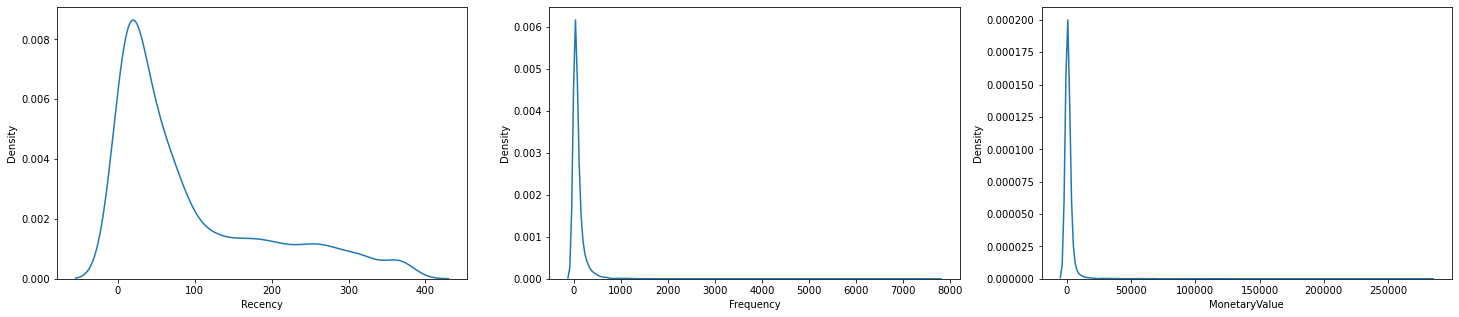

In [77]:
f,ax = plt.subplots(figsize=(25, 5))
plt.subplot(1, 3, 1); sns.kdeplot(rfm_cluster['Recency'])
plt.subplot(1, 3, 2); sns.kdeplot(rfm_cluster['Frequency'])
plt.subplot(1, 3, 3); sns.kdeplot(rfm_cluster['MonetaryValue'])

* 위의 시각화 결과로 알 수 있듯이 데이터 왜곡이 보인다
* 일반적으로 군집을 수행하기 전에는 평균과 분산을 정규화 하는 것이 좋다
* 데이터를 중앙 집중화 하기 위해 로그 변환을 수행한다

In [78]:
# 로그 변환
rfm_cluster_log = np.log(rfm_cluster) 

In [79]:
rfm_cluster_log.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,3.768762,3.671429,6.583176
std,1.431498,1.321051,1.261833
min,0.000000,0.000000,1.064711
25%,2.890372,2.833213,5.725063
50%,3.931826,3.713572,6.505029
75%,4.961090,4.584967,7.414050
max,5.924256,8.945854,12.543280


<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

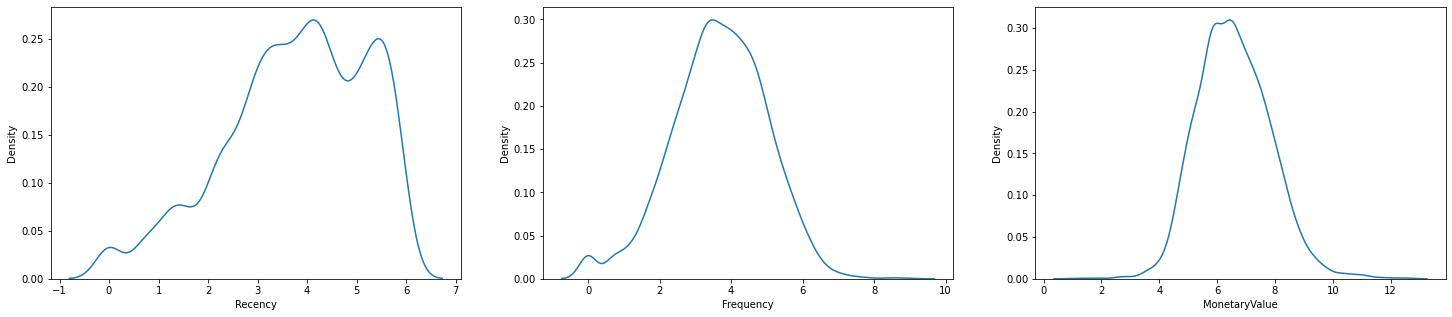

In [80]:
# 로그 변환한 데이터를 다시 시각화하여 확인해보기
f,ax = plt.subplots(figsize=(25, 5))
plt.subplot(1, 3, 1); sns.kdeplot(rfm_cluster_log['Recency'])
plt.subplot(1, 3, 2); sns.kdeplot(rfm_cluster_log['Frequency'])
plt.subplot(1, 3, 3); sns.kdeplot(rfm_cluster_log['MonetaryValue'])

In [81]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()
scaler.fit(rfm_cluster_log)

StandardScaler()

In [84]:
rfm_norm = scaler.fit_transform(rfm_cluster_log)
rfm_norm = pd.DataFrame(data=rfm_norm, index=rfm_cluster_log.index, columns=rfm_cluster_log.columns)
rfm_norm.describe()

,Recency,Frequency,MonetaryValue
count,4.338000e+03,4.338000e+03,4.338000e+03
mean,-3.135241e-16,6.395683e-17,4.215418e-16
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-2.633044e+00,-2.779493e+00,-4.373877e+00
25%,-6.136869e-01,-6.345797e-01,-6.801311e-01
50%,1.139244e-01,3.190506e-02,-6.193819e-02
75%,8.330196e-01,6.916040e-01,6.585423e-01
max,1.505935e+00,3.993059e+00,4.723916e+00


* 데이터를 가장 잘 나눌 수 있는 군집 수를 알아보기 위해 elbow method 사용
* 엘보우 방법으로 데이터의 군집 수 결정
* 위의 데이터의 경우 5개의 클러스터를 사용하기로 결정

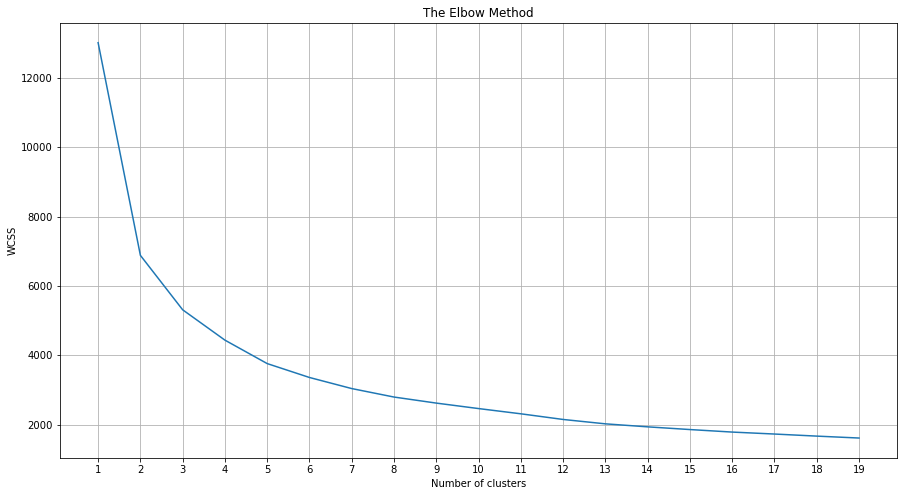

In [86]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state=42)
    # rfm_norm 값 학습
    # wcss에 inertia_ 값 넣어 elbow 값을 본다
    kmeans.fit(rfm_norm)
    wcss.append(kmeans.inertia_)
                
plt.figure(figsize=(15,8))
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()

In [87]:
# 5개의 클러스터
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(rfm_norm)

KMeans(n_clusters=5)

In [88]:
kmeans.cluster_centers_

array([[ 0.04728469,  0.67223228,  0.65074283],
       [ 0.73667676, -1.49124719, -1.24801699],
       [-0.83664741, -0.15800293, -0.29338649],
       [-1.42230503,  1.30579799,  1.42045938],
       [ 0.80739829, -0.30016138, -0.39512669]])

In [89]:
kmeans.labels_

array([0, 3, 0, ..., 2, 3, 0])

In [91]:
rfm['Cluster'] = kmeans.labels_
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment,Cluster
CustomerID,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6,Middle,0
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12,Top,3
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8,Middle,0
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,Top,0
12350.0,310,17,334.40,1,1,2,1.01.02.0,4,Low,4


In [92]:
# 군집화 한 데이터 값 요약하기
# Recency, Frequency의 평균값 구하고 MonetaryValue의 평균, count 값 구하기
rfm.groupby(['Cluster']).agg({"Recency" : "mean",
                            "Frequency" : "mean",
                            "MonetaryValue" : ["mean", "count"]}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          61.0     113.0        2090.0  1028
1         171.0       7.0         198.0   692
2          17.0      40.0         626.0   763
3           9.0     320.0        8348.0   637
4         166.0      31.0         523.0  1218

클러스터 0, 4, 1의 성능이 향상되는 것 처럼 보임

In [93]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost,InvoiceDateCon,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.3,2010-12-01,2010-12-01,1


In [99]:
df = df.drop(columns='id_null', axis=1)

In [101]:
df_trim = df.iloc[:, [6, 7, 8, 9, 11]]
df_trim.head(1)

,CustomerID,Country,TotalCost,InvoiceDateCon,CohortIndex
0,17850.0,United Kingdom,15.3,2010-12-01,1


In [102]:
rfm.head(1)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment,Cluster
CustomerID,,,,,,,,,,
12346.0,326,1,77183.6,1,1,4,1.01.04.0,6,Middle,0


In [105]:
mean_clus = rfm.groupby(['Cluster']).mean()
pop_avg = rfm.mean()
relative_imp = mean_clus / pop_avg - 1
relative_imp = relative_imp.dropna(axis=1).iloc[:, [3,0,1]]

<AxesSubplot:ylabel='Cluster'>

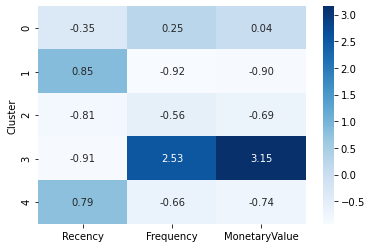

In [107]:
# 위의 값 히트맵으로 표시
sns.heatmap(relative_imp, annot=True, cmap='Blues', fmt='.2f')

* 이 데이터 세트를 별도의 프레임으로 분류
* 어떤 클러스터에 어떤 세그먼트가 나타나는지에 대한 추가 분석 수행

In [110]:
rfm_c1 = rfm[rfm['Cluster'] == 0]
rfm_c2 = rfm[rfm['Cluster'] == 1]
rfm_c3 = rfm[rfm['Cluster'] == 2]
rfm_c4 = rfm[rfm['Cluster'] == 3]
rfm_c5 = rfm[rfm['Cluster'] == 4]

In [111]:
rfm_c1

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment,Cluster
CustomerID,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6,Middle,0
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8,Middle,0
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,Top,0
12352.0,36,85,2506.04,3,3,4,3.03.04.0,10,Top,0
12356.0,23,59,2811.43,3,3,4,3.03.04.0,10,Top,0
...,...,...,...,...,...,...,...,...,...,...
18257.0,39,118,2337.63,3,4,4,3.04.04.0,11,Top,0
18259.0,25,42,2338.60,3,3,4,3.03.04.0,10,Top,0
18260.0,173,133,2628.35,1,4,4,1.04.04.0,9,Middle,0


In [112]:
# 클러스터 별 세그먼트 알아보기
rfm_c1.groupby(['General_Segment']).agg({'Recency' : 'mean',
                                        'Frequency' : 'mean',
                                        'MonetaryValue' : ['mean', 'count']}).round(0)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Middle             81.0      82.0        1804.0   540
Top                38.0     147.0        2407.0   488

In [113]:
rfm_c2.groupby(['General_Segment']).agg({'Recency' : 'mean',
                                        'Frequency' : 'mean',
                                        'MonetaryValue' : ['mean', 'count']}).round(0)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Low               180.0       7.0         181.0   647
Middle             40.0       4.0         448.0    45

In [114]:
rfm_c3.groupby(['General_Segment']).agg({'Recency' : 'mean',
                                        'Frequency' : 'mean',
                                        'MonetaryValue' : ['mean', 'count']}).round(0)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Low                25.0      13.0         231.0    31
Middle             19.0      35.0         546.0   593
Top                 9.0      67.0        1054.0   139

In [115]:
rfm_c4.groupby(['General_Segment']).agg({'Recency' : 'mean',
                                        'Frequency' : 'mean',
                                        'MonetaryValue' : ['mean', 'count']}).round(0)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Middle              3.0       9.0       12394.0     1
Top                 9.0     320.0        8342.0   636

In [116]:
rfm_c5.groupby(['General_Segment']).agg({'Recency' : 'mean',
                                        'Frequency' : 'mean',
                                        'MonetaryValue' : ['mean', 'count']}).round(0)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Low               213.0      23.0         359.0   610
Middle            119.0      38.0         688.0   608

In [118]:
df_trim

,CustomerID,Country,TotalCost,InvoiceDateCon,CohortIndex
0,17850.0,United Kingdom,15.30,2010-12-01,1
1,17850.0,United Kingdom,20.34,2010-12-01,1
2,17850.0,United Kingdom,22.00,2010-12-01,1
3,17850.0,United Kingdom,20.34,2010-12-01,1
4,17850.0,United Kingdom,20.34,2010-12-01,1
...,...,...,...,...,...
541904,12680.0,France,10.20,2011-12-01,5
541905,12680.0,France,12.60,2011-12-01,5
541906,12680.0,France,16.60,2011-12-01,5
541907,12680.0,France,16.60,2011-12-01,5


In [119]:
rfm['CustomerID'] = rfm.index

In [120]:
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment,Cluster,CustomerID
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6,Middle,0,12346.0
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12,Top,3,12347.0
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8,Middle,0,12348.0
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,Top,0,12349.0
12350.0,310,17,334.40,1,1,2,1.01.02.0,4,Low,4,12350.0
...,...,...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,1.01.01.0,3,Low,1,18280.0
18281.0,181,7,80.82,1,1,1,1.01.01.0,3,Low,1,18281.0
18282.0,8,12,178.05,4,1,1,4.01.01.0,6,Middle,2,18282.0


In [121]:
# 인덱스 새로 다시 지정
rfm.reset_index(drop=True, inplace=True)

* 모든 데이터 프레임 완성되었으므로 돌아가서 필요한 병합을 수행
* 첫 번재 데이터 프레임에서 고객 ID를 클러스터와 rfm 점수 및 세그먼트로 매핑
* 이를 통해 마케팅 혹은 영업팀에서 추가 분석 및 타겟팅에 사용할 수 있는 깨끗한 데이터 세트 제공

In [122]:
# 데이터 병합
df_rework = pd.merge(df_trim, rfm, on='CustomerID')

In [123]:
# 데이터 확인
df_rework.sample(10)

,CustomerID,Country,TotalCost,InvoiceDateCon,CohortIndex,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment,Cluster
129579,14684.0,United Kingdom,3.90,2011-11-01,12,26,390,1201.51,3,4,3,3.04.03.0,10,Top,0
58669,16033.0,United Kingdom,15.00,2011-09-01,10,6,1128,8778.82,4,4,4,4.04.04.0,12,Top,3
374498,17125.0,United Kingdom,1.25,2011-10-01,1,50,35,230.50,3,2,1,3.02.01.0,6,Middle,4
266816,16728.0,United Kingdom,1.65,2011-03-01,1,46,263,1048.28,3,4,3,3.04.03.0,10,Top,0
359610,15714.0,United Kingdom,4.95,2011-11-01,3,12,34,330.03,4,2,2,4.02.02.0,8,Middle,2
389077,16482.0,United Kingdom,11.70,2011-11-01,1,16,18,220.62,4,2,1,4.02.01.0,7,Middle,2
294943,16185.0,United Kingdom,13.20,2011-04-01,1,17,31,529.41,4,2,2,4.02.02.0,8,Middle,2
215837,15203.0,United Kingdom,5.04,2011-11-01,10,26,142,1827.80,3,4,4,3.04.04.0,11,Top,0
49833,14156.0,EIRE,121.68,2011-11-01,12,10,1395,117210.08,4,4,4,4.04.04.0,12,Top,3
159874,14016.0,EIRE,81.60,2011-07-01,8,162,161,4341.21,1,4,4,1.04.04.0,9,Middle,0


In [124]:
df_rework.describe()

,CustomerID,TotalCost,CohortIndex,Recency,Frequency,MonetaryValue,RFM_Score,Cluster
count,392691.000000,392691.000000,392691.000000,392691.000000,392691.000000,392691.000000,392691.000000,392691.000000
mean,15287.840916,22.202544,5.147592,41.114057,652.164447,11564.495722,10.274539,2.107652
std,1713.540734,156.608909,3.850200,65.403960,1421.138766,31428.874857,2.152055,1.443429
min,12346.000000,0.001000,1.000000,1.000000,1.000000,2.900000,3.000000,0.000000
25%,13955.000000,4.950000,1.000000,4.000000,89.000000,1097.620000,9.000000,0.000000
50%,15150.000000,12.450000,4.000000,17.000000,197.000000,2662.060000,11.000000,3.000000
75%,16791.000000,19.800000,8.000000,43.000000,441.000000,6287.770000,12.000000,3.000000
max,18287.000000,77183.600000,13.000000,374.000000,7676.000000,280206.020000,12.000000,4.000000
